In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df= pd.read_excel('/sydney_rain prediction.xlsx',header=0)

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [9]:
df.MinTemp=df.MinTemp.fillna(df.MinTemp.mean())
df.MaxTemp=df.MaxTemp.fillna(df.MaxTemp.mean())
df.Rainfall=df.Rainfall.fillna(df.Rainfall.mean())
df.Evaporation=df.Evaporation.fillna(df.Evaporation.mean())
df.Sunshine=df.Sunshine.fillna(df.Sunshine.mean())
df.RainToday=df.RainToday.fillna(df.RainToday.mode()[0])
df.Humidity9am=df.Humidity9am.fillna(df.Humidity9am.mean())
df.Humidity3pm=df.Humidity3pm.fillna(df.Humidity3pm.mean())
df.Pressure9am=df.Pressure9am.fillna(df.Pressure9am.mean())
df.Pressure3pm=df.Pressure3pm.fillna(df.Pressure3pm.mean())
df.Cloud9am=df.Cloud9am.fillna(df.Cloud9am.mean())
df.Cloud3pm=df.Cloud3pm.fillna(df.Cloud3pm.mean())
df.Temp9am=df.Temp9am.fillna(df.Temp9am.mean())
df.Temp3pm=df.Temp3pm.fillna(df.Temp3pm.mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

In [11]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156


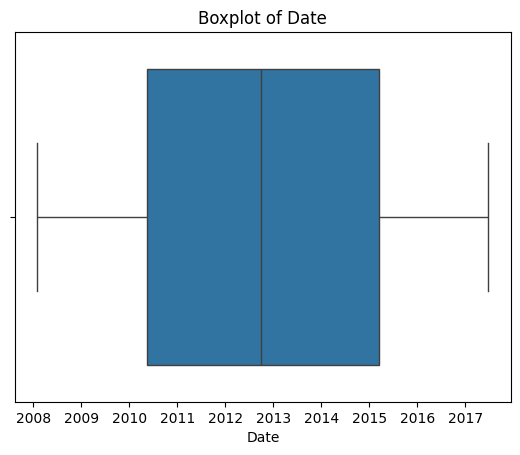

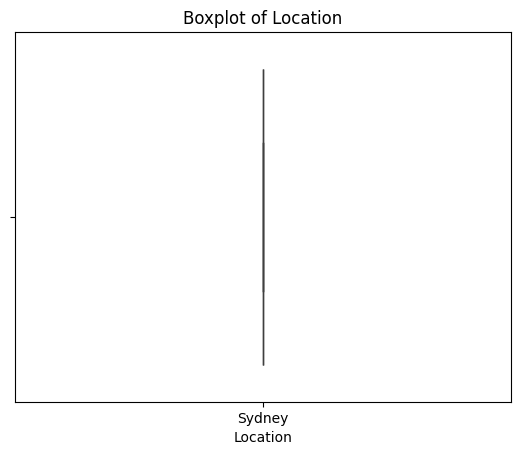

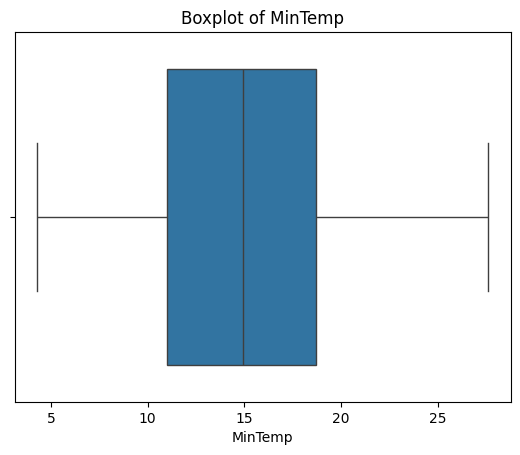

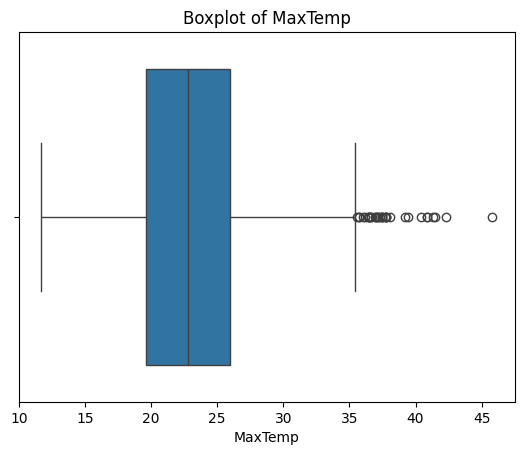

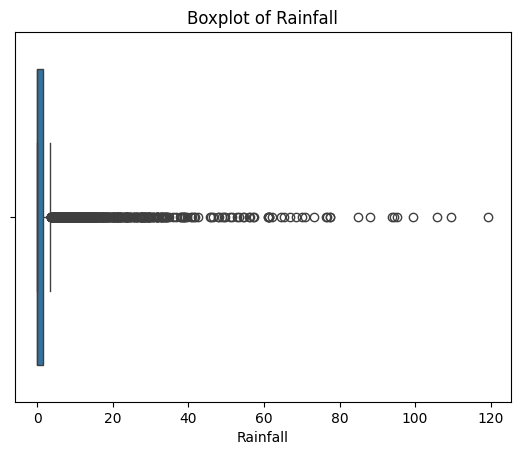

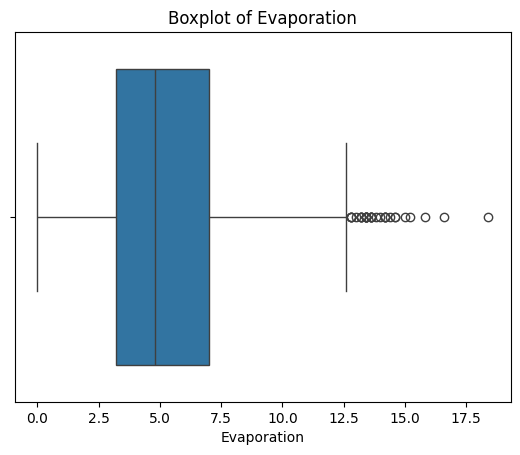

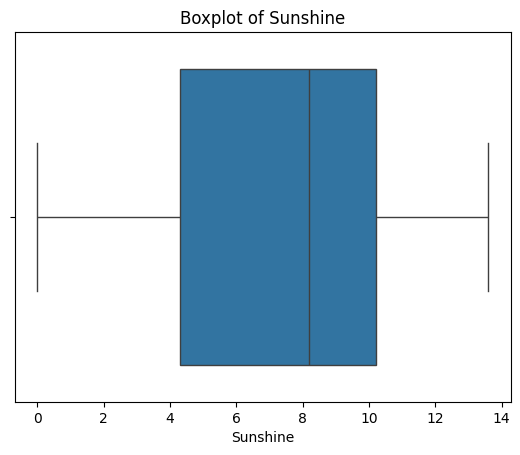

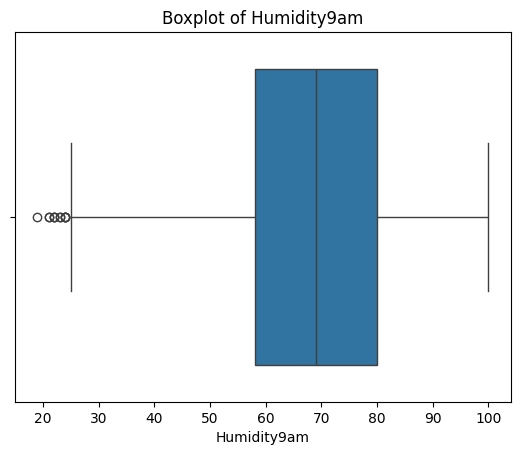

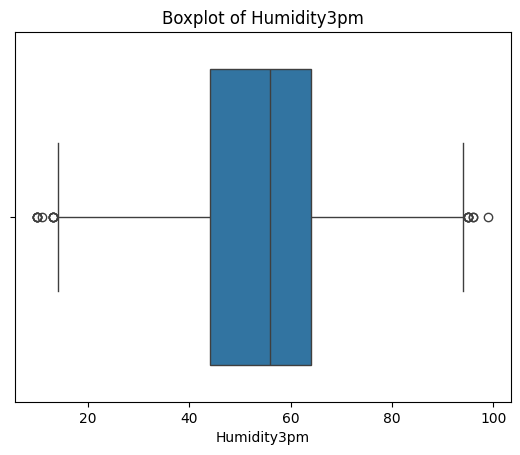

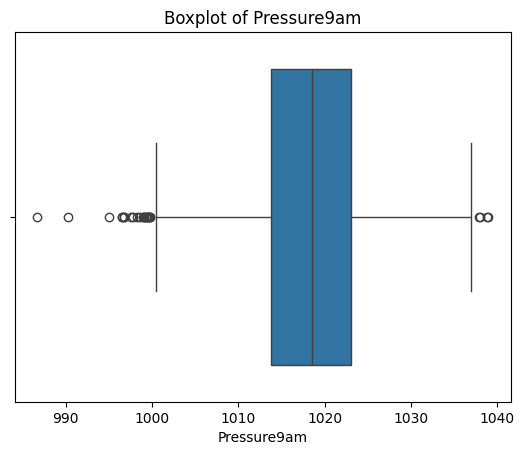

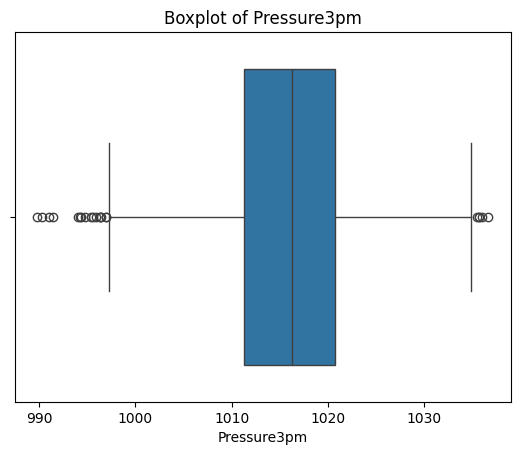

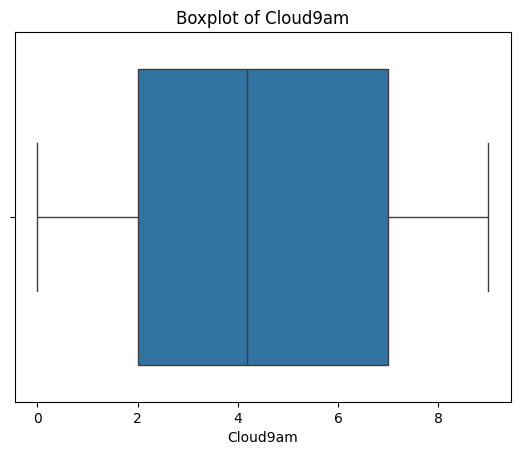

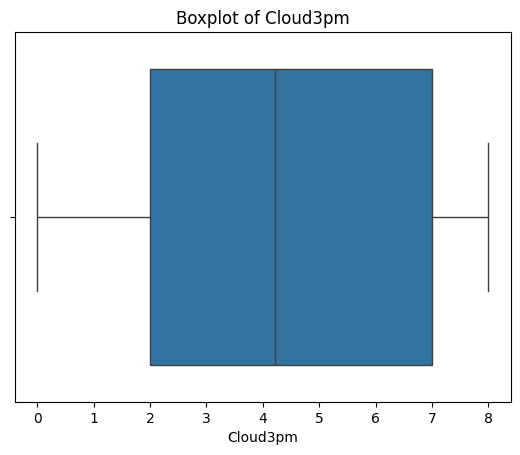

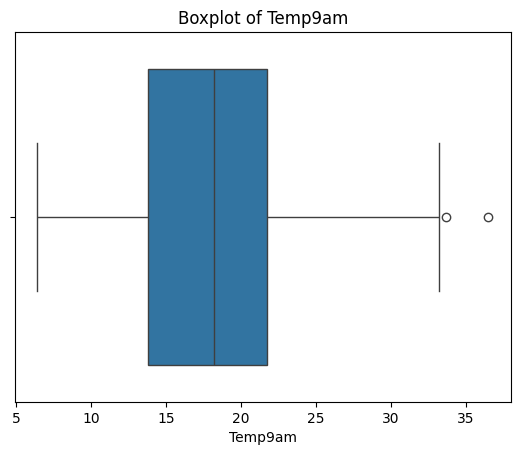

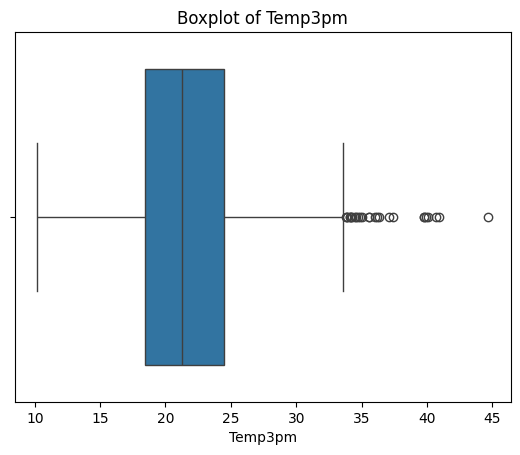

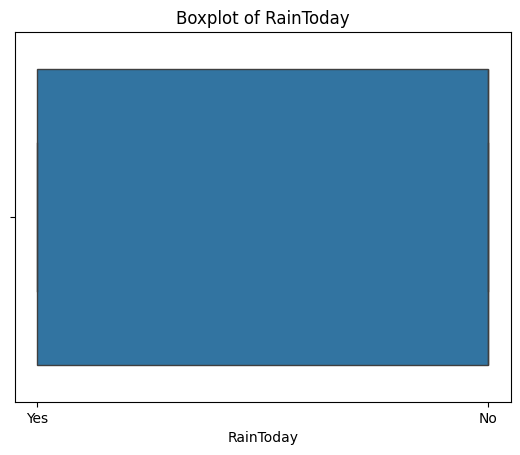

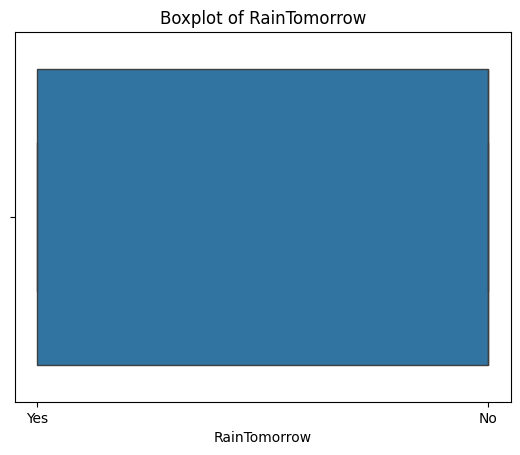

In [12]:
# Create a boxplot for each column
for col in df.columns:
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

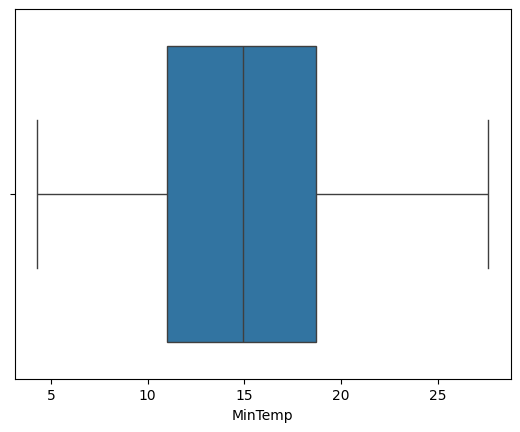

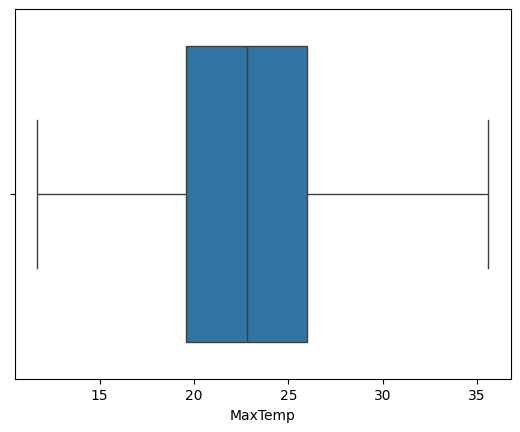

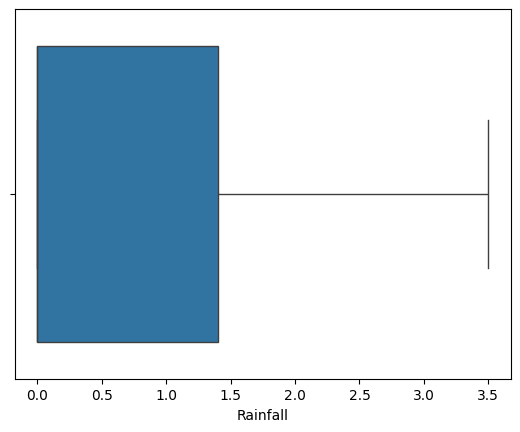

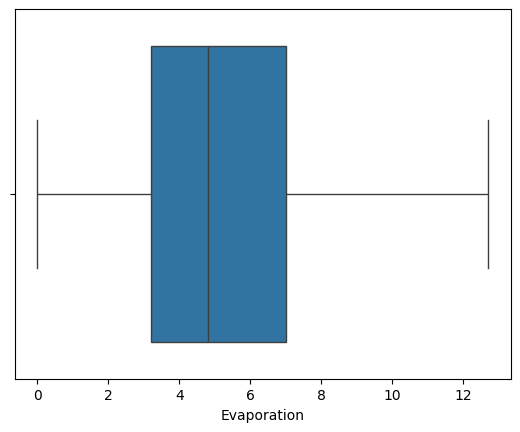

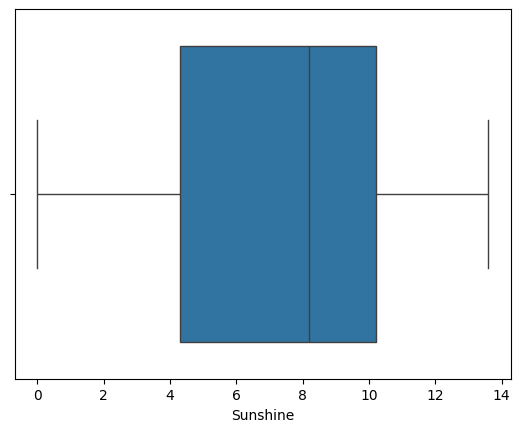

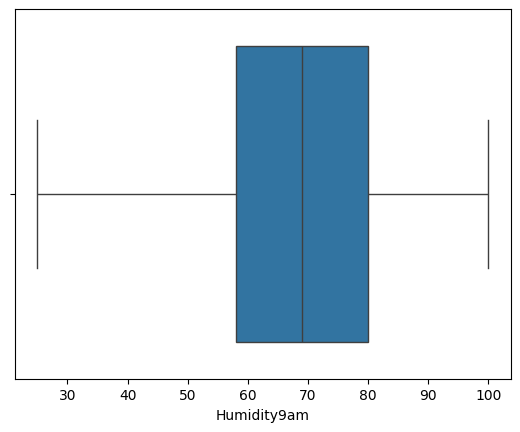

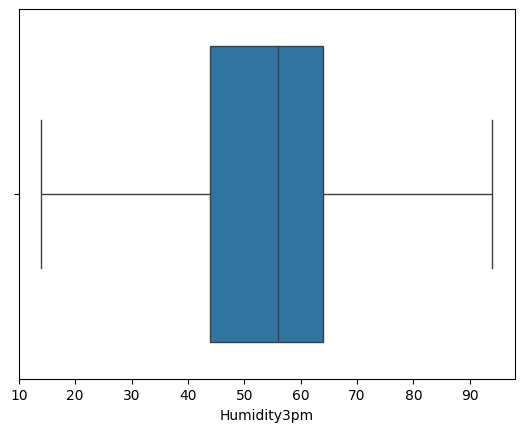

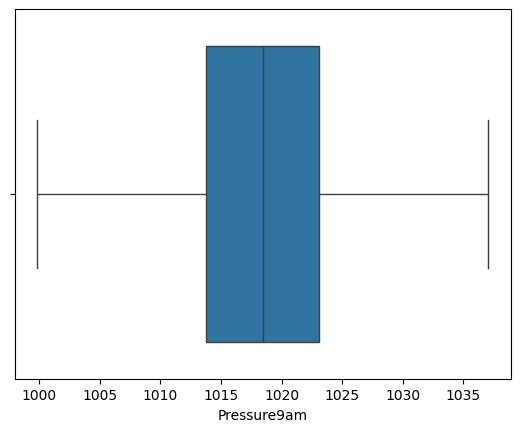

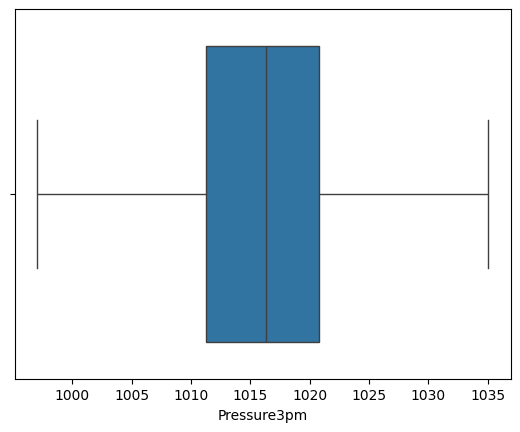

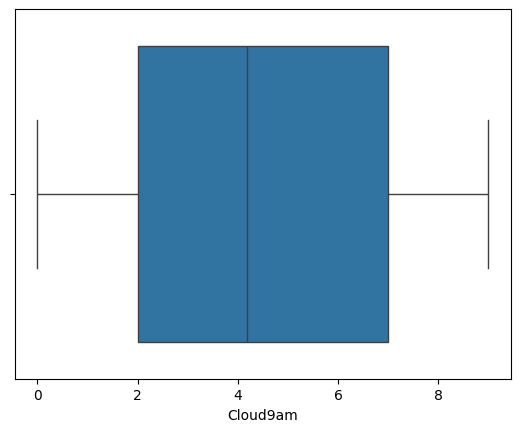

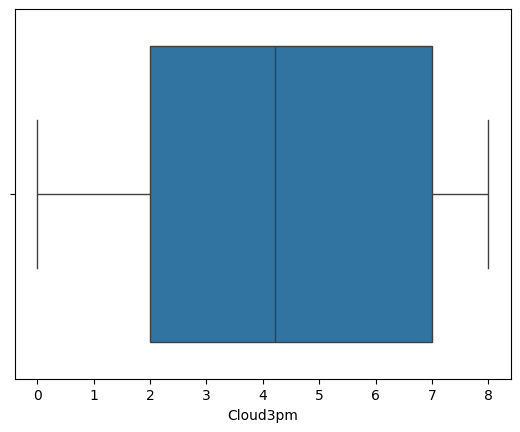

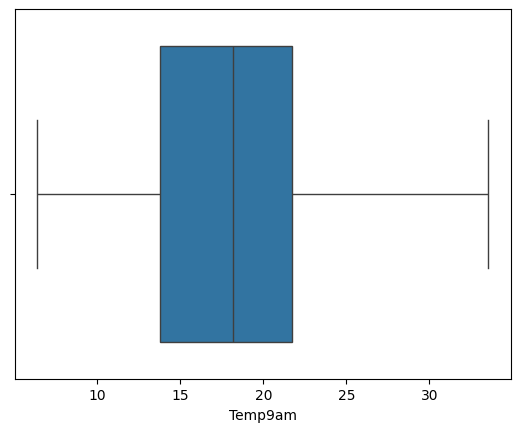

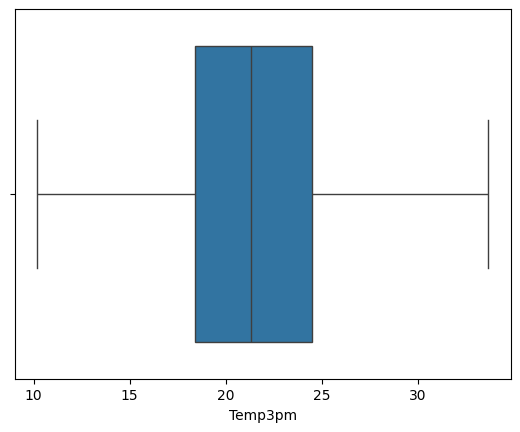

In [13]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Check for outliers again
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


In [14]:
df = df.drop('Location', axis=1)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [15]:
df=pd.get_dummies(df,columns=['RainTomorrow','RainToday'],drop_first=True)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
0,2008-02-01,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True
1,2008-02-02,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True
2,2008-02-03,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True
3,2008-02-04,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True
4,2008-02-05,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True


In [16]:
df['RainTomorrow_Yes'] = df['RainTomorrow_Yes'].replace({True: 1, False: 0})

In [17]:
df['RainToday_Yes'] = df['RainToday_Yes'].replace({True: 1, False: 0})
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes,RainToday_Yes
0,2008-02-01,19.5,22.4,3.5,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,2008-02-02,19.5,25.6,3.5,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,2008-02-03,21.6,24.5,3.5,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,2008-02-04,20.2,22.8,3.5,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,2008-02-05,19.7,25.7,3.5,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1


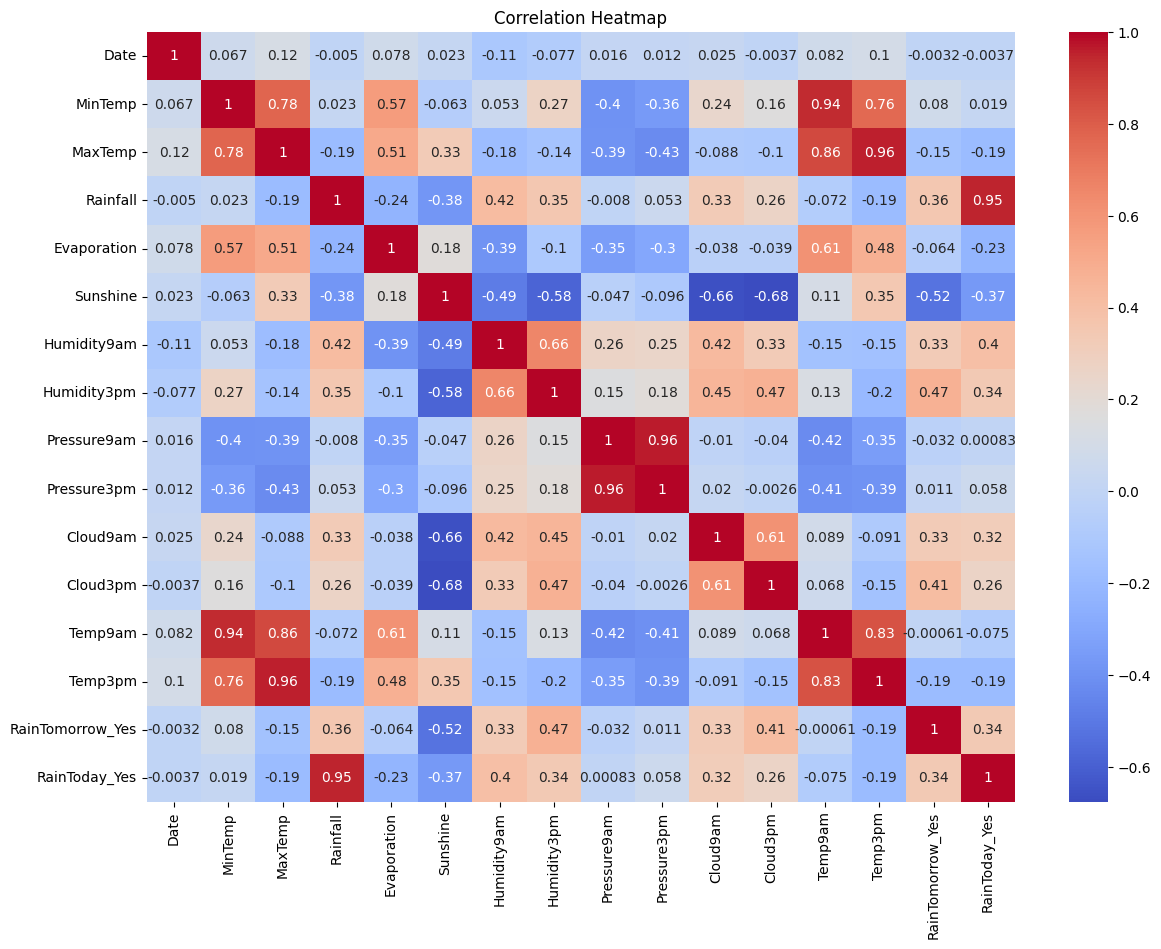

In [18]:
# Calculate the correlation matrix
corr = df.corr()
plt.figure(figsize=(14, 10))
# Generate a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [19]:
df['Date'] = df['Date'].apply(lambda x: x.toordinal())
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)
y_train_pred= classifier.predict(X_train)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy score for test data:', accuracy_score(y_test, y_pred))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred))

# Evaluate the model on the training set
y_train_pred = classifier.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred))

Accuracy score for test data: 0.7634730538922155
Confusion matrix for test data:
 [[510   0]
 [158   0]]
Accuracy score for training data: 0.7351067815661296
Confusion matrix for training data:
 [[1962    0]
 [ 707    0]]


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis (LDA) object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda = lda.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_lda))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_lda))

# Evaluate the model on the training set
y_train_pred_lda = lda.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_lda))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_lda))

Accuracy score for test data: 0.8368263473053892
Confusion matrix for test data:
 [[470  40]
 [ 69  89]]
Accuracy score for training data: 0.8313975271637317
Confusion matrix for training data:
 [[1797  165]
 [ 285  422]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN classifier to the training data
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_knn))

# Evaluate the KNN model on the training set
y_train_pred_knn = knn.predict(X_train_scaled)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_knn))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_knn))

Accuracy score for test data: 0.8218562874251497
Confusion matrix for test data:
 [[474  36]
 [ 83  75]]
Accuracy score for training data: 0.8651180217309854
Confusion matrix for training data:
 [[1877   85]
 [ 275  432]]


In [22]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors': range(1, 21)}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_knn_tuned = grid_search.predict(X_test_scaled)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_knn_tuned))


Best parameters: {'n_neighbors': 11}
Best score: 0.8231591373822121
Accuracy score for test data: 0.8308383233532934
Confusion matrix for test data:
 [[479  31]
 [ 82  76]]


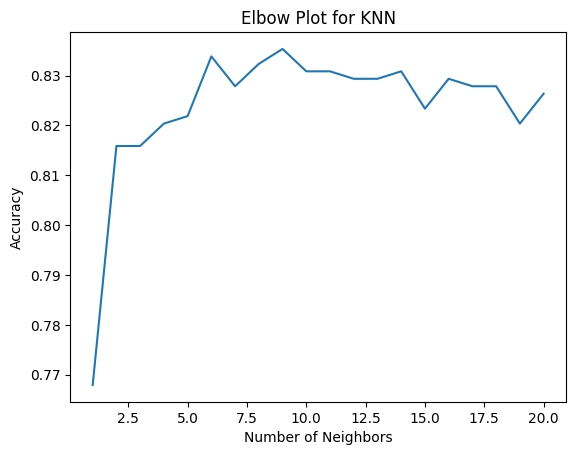

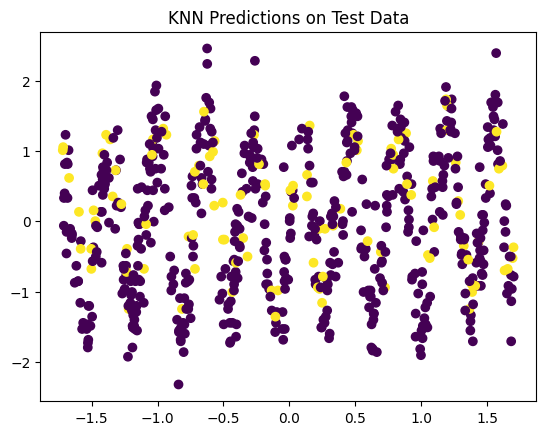

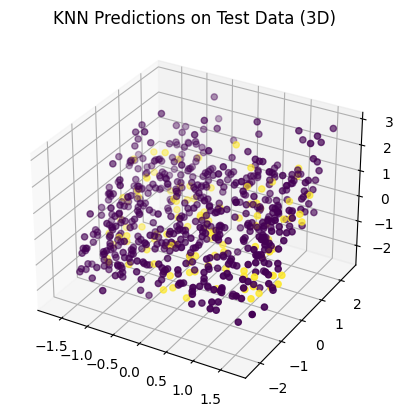

In [23]:
# Elbow plot to find the optimal number of neighbors
k_range = range(1, 21)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  scores.append(accuracy_score(y_test, knn.predict(X_test_scaled)))

plt.plot(k_range, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Elbow Plot for KNN')
plt.show()

# Scatter plot of the data points colored by their predicted labels
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred_knn_tuned)
plt.title('KNN Predictions on Test Data')
plt.show()

# 3D scatter plot of the data points colored by their predicted labels
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_pred_knn_tuned)
plt.title('KNN Predictions on Test Data (3D)')
plt.show()

Accuracy score for test data: 0.7589820359281437
Confusion matrix for test data:
 [[424  86]
 [ 75  83]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]
Best parameters: {'max_depth': 4}
Best score: 0.828777114910302
Accuracy score for test data: 0.8323353293413174
Confusion matrix for test data:
 [[483  27]
 [ 85  73]]


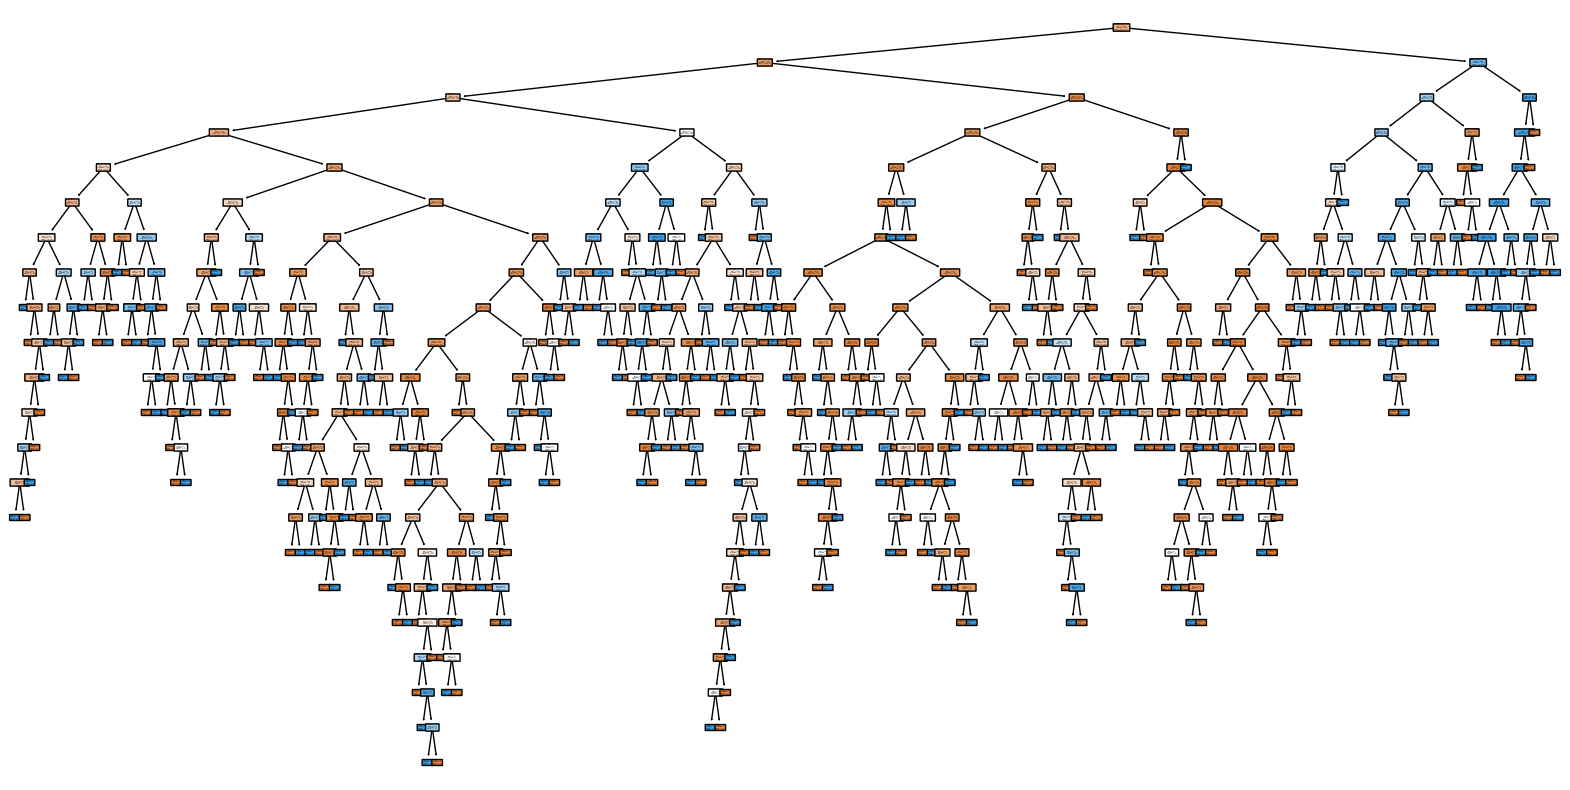

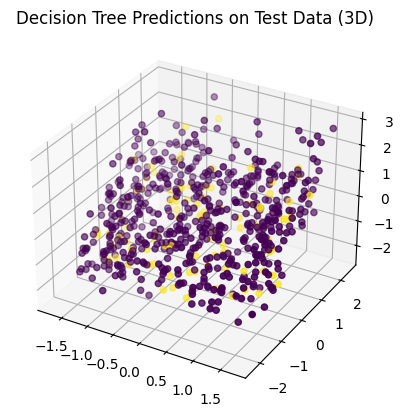

In [24]:
# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtree = DecisionTreeClassifier()

# Fit the decision tree to the training data
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree = dtree.predict(X_test)

# Evaluate the Decision Tree model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree))

# Evaluate the Decision Tree model on the training set
y_train_pred_dtree = dtree.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_dtree))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_dtree))


# Perform grid search cross-validation to find the optimal hyperparameters
param_grid = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_dtree_tuned = grid_search.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree_tuned))


# Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, rounded=True, class_names=['Yes', 'No'], feature_names=X.columns)
plt.show()

# 3D scatter plot of the data points colored by their predicted labels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_pred_dtree_tuned)
plt.title('Decision Tree Predictions on Test Data (3D)')
plt.show()

Accuracy score for test data: 0.811377245508982
Confusion matrix for test data:
 [[457  53]
 [ 73  85]]


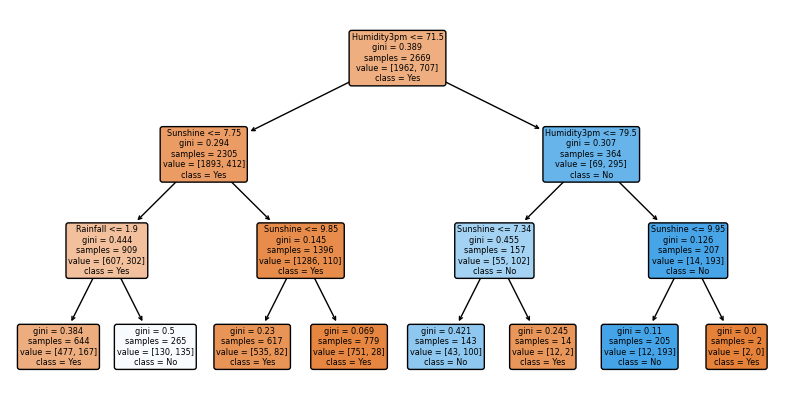

In [25]:
# Prune the decision tree to a maximum depth of 3
dtree_pruned = DecisionTreeClassifier(max_depth=3)

# Fit the pruned tree to the training data
dtree_pruned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtree_pruned = dtree_pruned.predict(X_test)

# Evaluate the pruned tree on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dtree_pruned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_dtree_pruned))

# Plot the pruned decision tree
plt.figure(figsize=(10,5))
plot_tree(dtree_pruned, filled=True, rounded=True, class_names=['Yes', 'No'], feature_names=X.columns)
plt.show()


In [26]:
# Import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf = RandomForestClassifier()

# Fit the random forest to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_rf))

# Evaluate the Random Forest model on the training set
y_train_pred_rf = rf.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_rf))

Accuracy score for test data: 0.8368263473053892
Confusion matrix for test data:
 [[483  27]
 [ 82  76]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]


In [37]:
# Use GridSearchCV to find the optimal hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [400],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the Random Forest model with the best parameters
rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train, y_train)

# Make predictions on the test set using the best parameters
y_pred_rf_tuned = rf_tuned.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_rf_tuned))

# Evaluate the model on the training set
y_train_pred_rf_tuned = rf_tuned.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf_tuned))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_rf_tuned))


Best parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 400}
Best score: 0.8347731377054479
Accuracy score for test data: 0.8413173652694611
Confusion matrix for test data:
 [[483  27]
 [ 79  79]]
Accuracy score for training data: 0.9089546646684151
Confusion matrix for training data:
 [[1927   35]
 [ 208  499]]


In [31]:
from xgboost import XGBClassifier

# Create an XGBoost classifier object
xgb = XGBClassifier()

# Fit the XGBoost model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb))

# Evaluate the XGBoost model on the training set
y_train_pred_xgb = xgb.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb))

# Use GridSearchCV to find the optimal hyperparameters for the XGBoost model
param_grid = {
    'n_estimators': [150],
    'max_depth': [10],
    'learning_rate': [0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the XGBoost model with the best parameters
xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_train, y_train)

# Make predictions on the test set using the best parameters
y_pred_xgb_tuned = xgb_tuned.predict(X_test)

# Evaluate the model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb_tuned))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb_tuned))

# Evaluate the model on the training set
y_train_pred_xgb_tuned = xgb_tuned.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb_tuned))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb_tuned))

Accuracy score for test data: 0.8353293413173652
Confusion matrix for test data:
 [[477  33]
 [ 77  81]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.7}
Best score: 0.8231591373822121
Accuracy score for test data: 0.8488023952095808
Confusion matrix for test data:
 [[487  23]
 [ 78  80]]
Accuracy score for training data: 1.0
Confusion matrix for training data:
 [[1962    0]
 [   0  707]]


In [35]:
# Use early stopping to prevent overfitting
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.7, colsample_bytree=0.7)
xgb.fit(X_train, y_train,eval_set=[(X_test, y_test)], verbose=False)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model on the test set
print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb))
print('Confusion matrix for test data:\n', confusion_matrix(y_test, y_pred_xgb))

# Evaluate the XGBoost model on the training set
y_train_pred_xgb = xgb.predict(X_train)
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb))
print('Confusion matrix for training data:\n', confusion_matrix(y_train, y_train_pred_xgb))

Accuracy score for test data: 0.8517964071856288
Confusion matrix for test data:
 [[489  21]
 [ 78  80]]
Accuracy score for training data: 0.9216935181715998
Confusion matrix for training data:
 [[1923   39]
 [ 170  537]]


TASK QUESTIONS

1. Your views about the problem statement?

As a ML Expert at The Daily Buzz, I need to create a machine learning model to accurately predict the rainfall in Sydney based on available data.


2. What will be your approach to solving this task?

First, we must enter the relevant data into the software and perform several procedures, such as treating outliers and replacing missing values with the mean.Thereafter, we need to convert categorical data to numerical data.To evaluate performance after data cleaning, utilize decision tree classification, bagging and boosting algorithms, and Random Forest Classifier.Generate confusion matrix and calculate accuracy scores.



3. What were the available ML model options you had to perform this task?

We must develop a machine learning model utilizing various classification models such as logistic regression, linear discriminant analysis, KNN, decision trees, and ensemble approaches, and compare the accuracy of each model.


4. Which model’s performance is best and what could be the possible reason for that?

XGBoost classifier emerges out as best performance model with test accuracy of 0.85.It is known for its high accuracy and effectiveness,following are the factors for its good performance,

1. Boosting Algorithm
XGBoost is based on gradient boosting, which develops models in a sequential order, with each model fixing faults caused by prior models.

2. Regularization
XGBoost incorporates regularization techniques  to prevent overfitting, which helps in improving the model's performance.

3. Handling Missing Values
XGBoost can automatically handle missing values. During training, it learns the optimal way to proceed when encountering missing values, which is very important when working with real-world data where some values may be missing.

4. Feature Importance
XGBoost has features for analyzing feature relevance, which aids in determining which characteristics contribute the most to forecasts.

These qualities make XGBoost an effective tool for high-accuracy classification and regression tasks.


5. What steps can you take to improve this selected model’s performance even further?

XGBoost offers a wide range of hyperparameters that can be tuned to optimize the model’s performance. Grid search or random search methods can be used to find the best hyperparameters, which can lead to better accuracy.